In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
import pandas as pd
url = 'https://raw.githubusercontent.com/reniellechavez/Master2019/master/Trimestre_II/DataDrivinBusiness/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_table(url,sep=',')
df.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

In [22]:
#no missing information
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

There are categorical variables and object

In [0]:
#Checking the website: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
#We are dropping the following columns due to unnecessary information: EmployeeCount, EmployeeNumber, StandarHours, Over18
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'],inplace=True)


In [25]:
forloop = {}
for column in df:
    if column != 'EmployeeNumber' and 'MonthlyRate' and 'MonthlyIncome':
      forloop[column] = df[column].value_counts().to_dict()
forloop


{'Age': {18: 8,
  19: 9,
  20: 11,
  21: 13,
  22: 16,
  23: 14,
  24: 26,
  25: 26,
  26: 39,
  27: 48,
  28: 48,
  29: 68,
  30: 60,
  31: 69,
  32: 61,
  33: 58,
  34: 77,
  35: 78,
  36: 69,
  37: 50,
  38: 58,
  39: 42,
  40: 57,
  41: 40,
  42: 46,
  43: 32,
  44: 33,
  45: 41,
  46: 33,
  47: 24,
  48: 19,
  49: 24,
  50: 30,
  51: 19,
  52: 18,
  53: 19,
  54: 18,
  55: 22,
  56: 14,
  57: 4,
  58: 14,
  59: 10,
  60: 5},
 'Attrition': {'No': 1233, 'Yes': 237},
 'BusinessTravel': {'Non-Travel': 150,
  'Travel_Frequently': 277,
  'Travel_Rarely': 1043},
 'DailyRate': {102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  109: 1,
  111: 3,
  115: 1,
  116: 2,
  117: 4,
  118: 2,
  119: 2,
  120: 2,
  121: 2,
  124: 2,
  125: 1,
  128: 1,
  129: 1,
  130: 2,
  131: 1,
  132: 1,
  134: 1,
  135: 3,
  136: 2,
  138: 2,
  140: 1,
  141: 2,
  142: 3,
  143: 1,
  144: 2,
  145: 1,
  146: 1,
  147: 4,
  148: 1,
  150: 1,
  152: 1,
  153: 2,
  154: 1,
  155: 2,
  156: 1,
  157: 2,


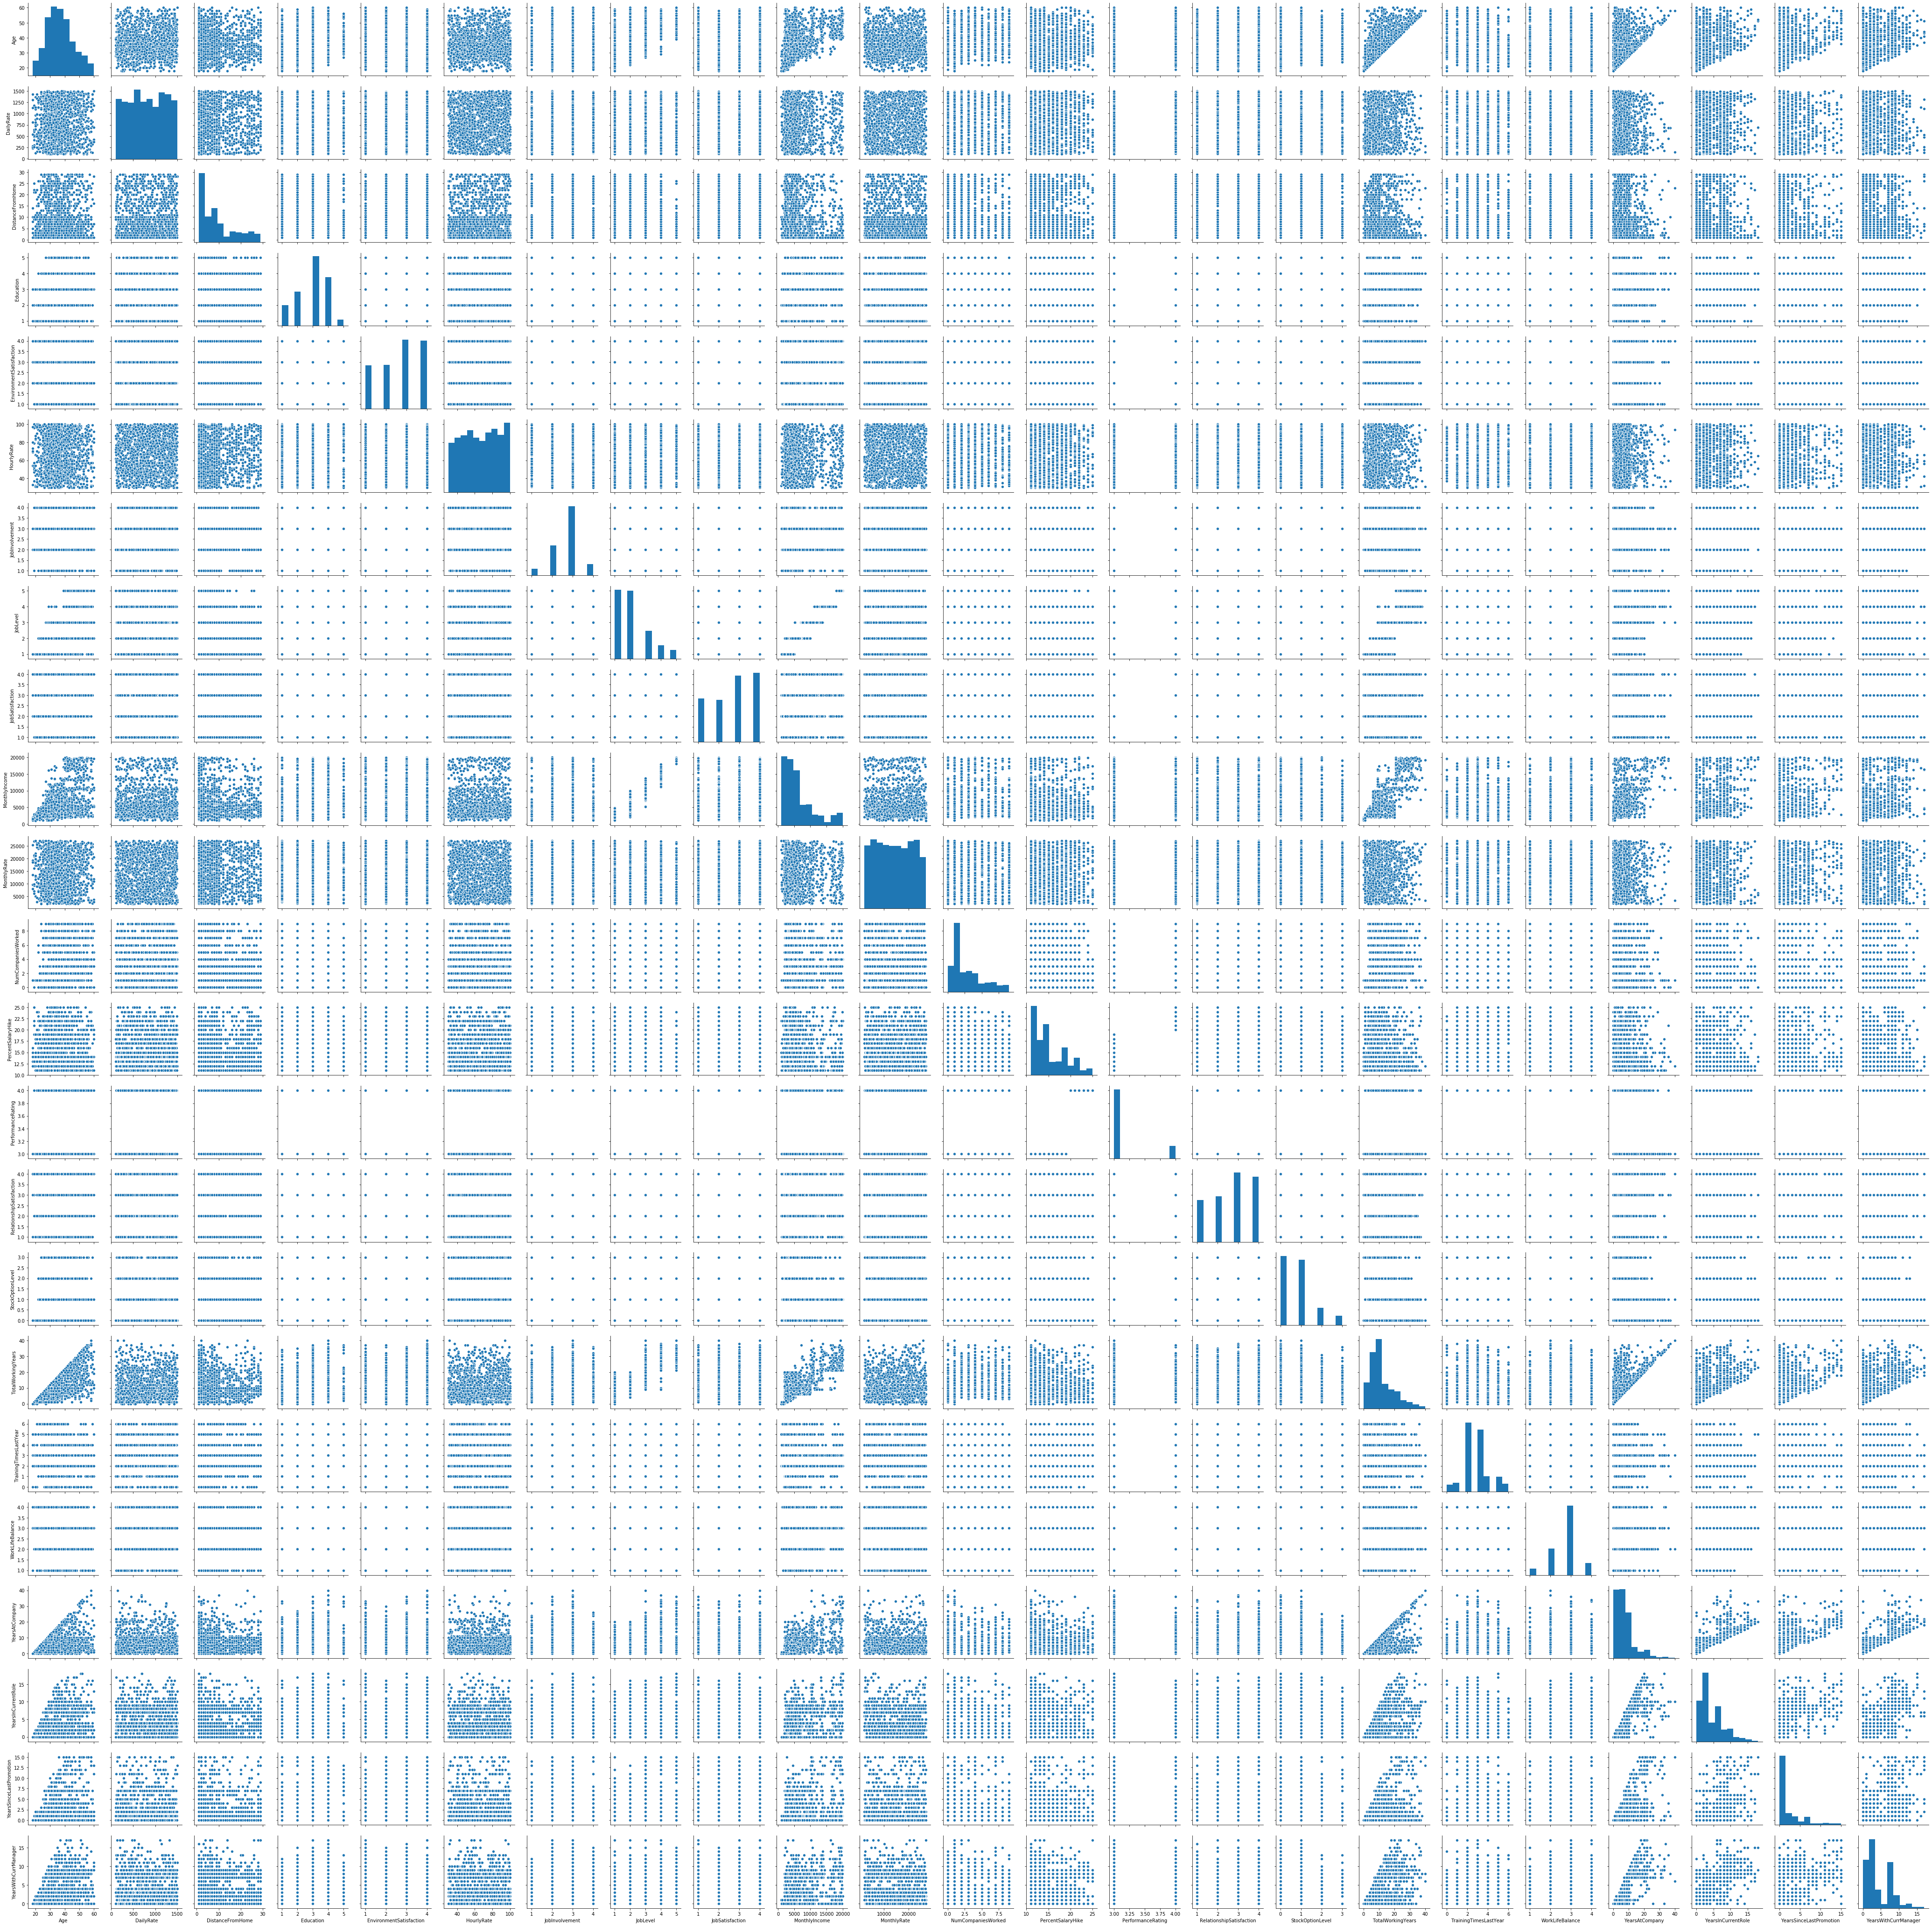

In [26]:
sns.pairplot(df)

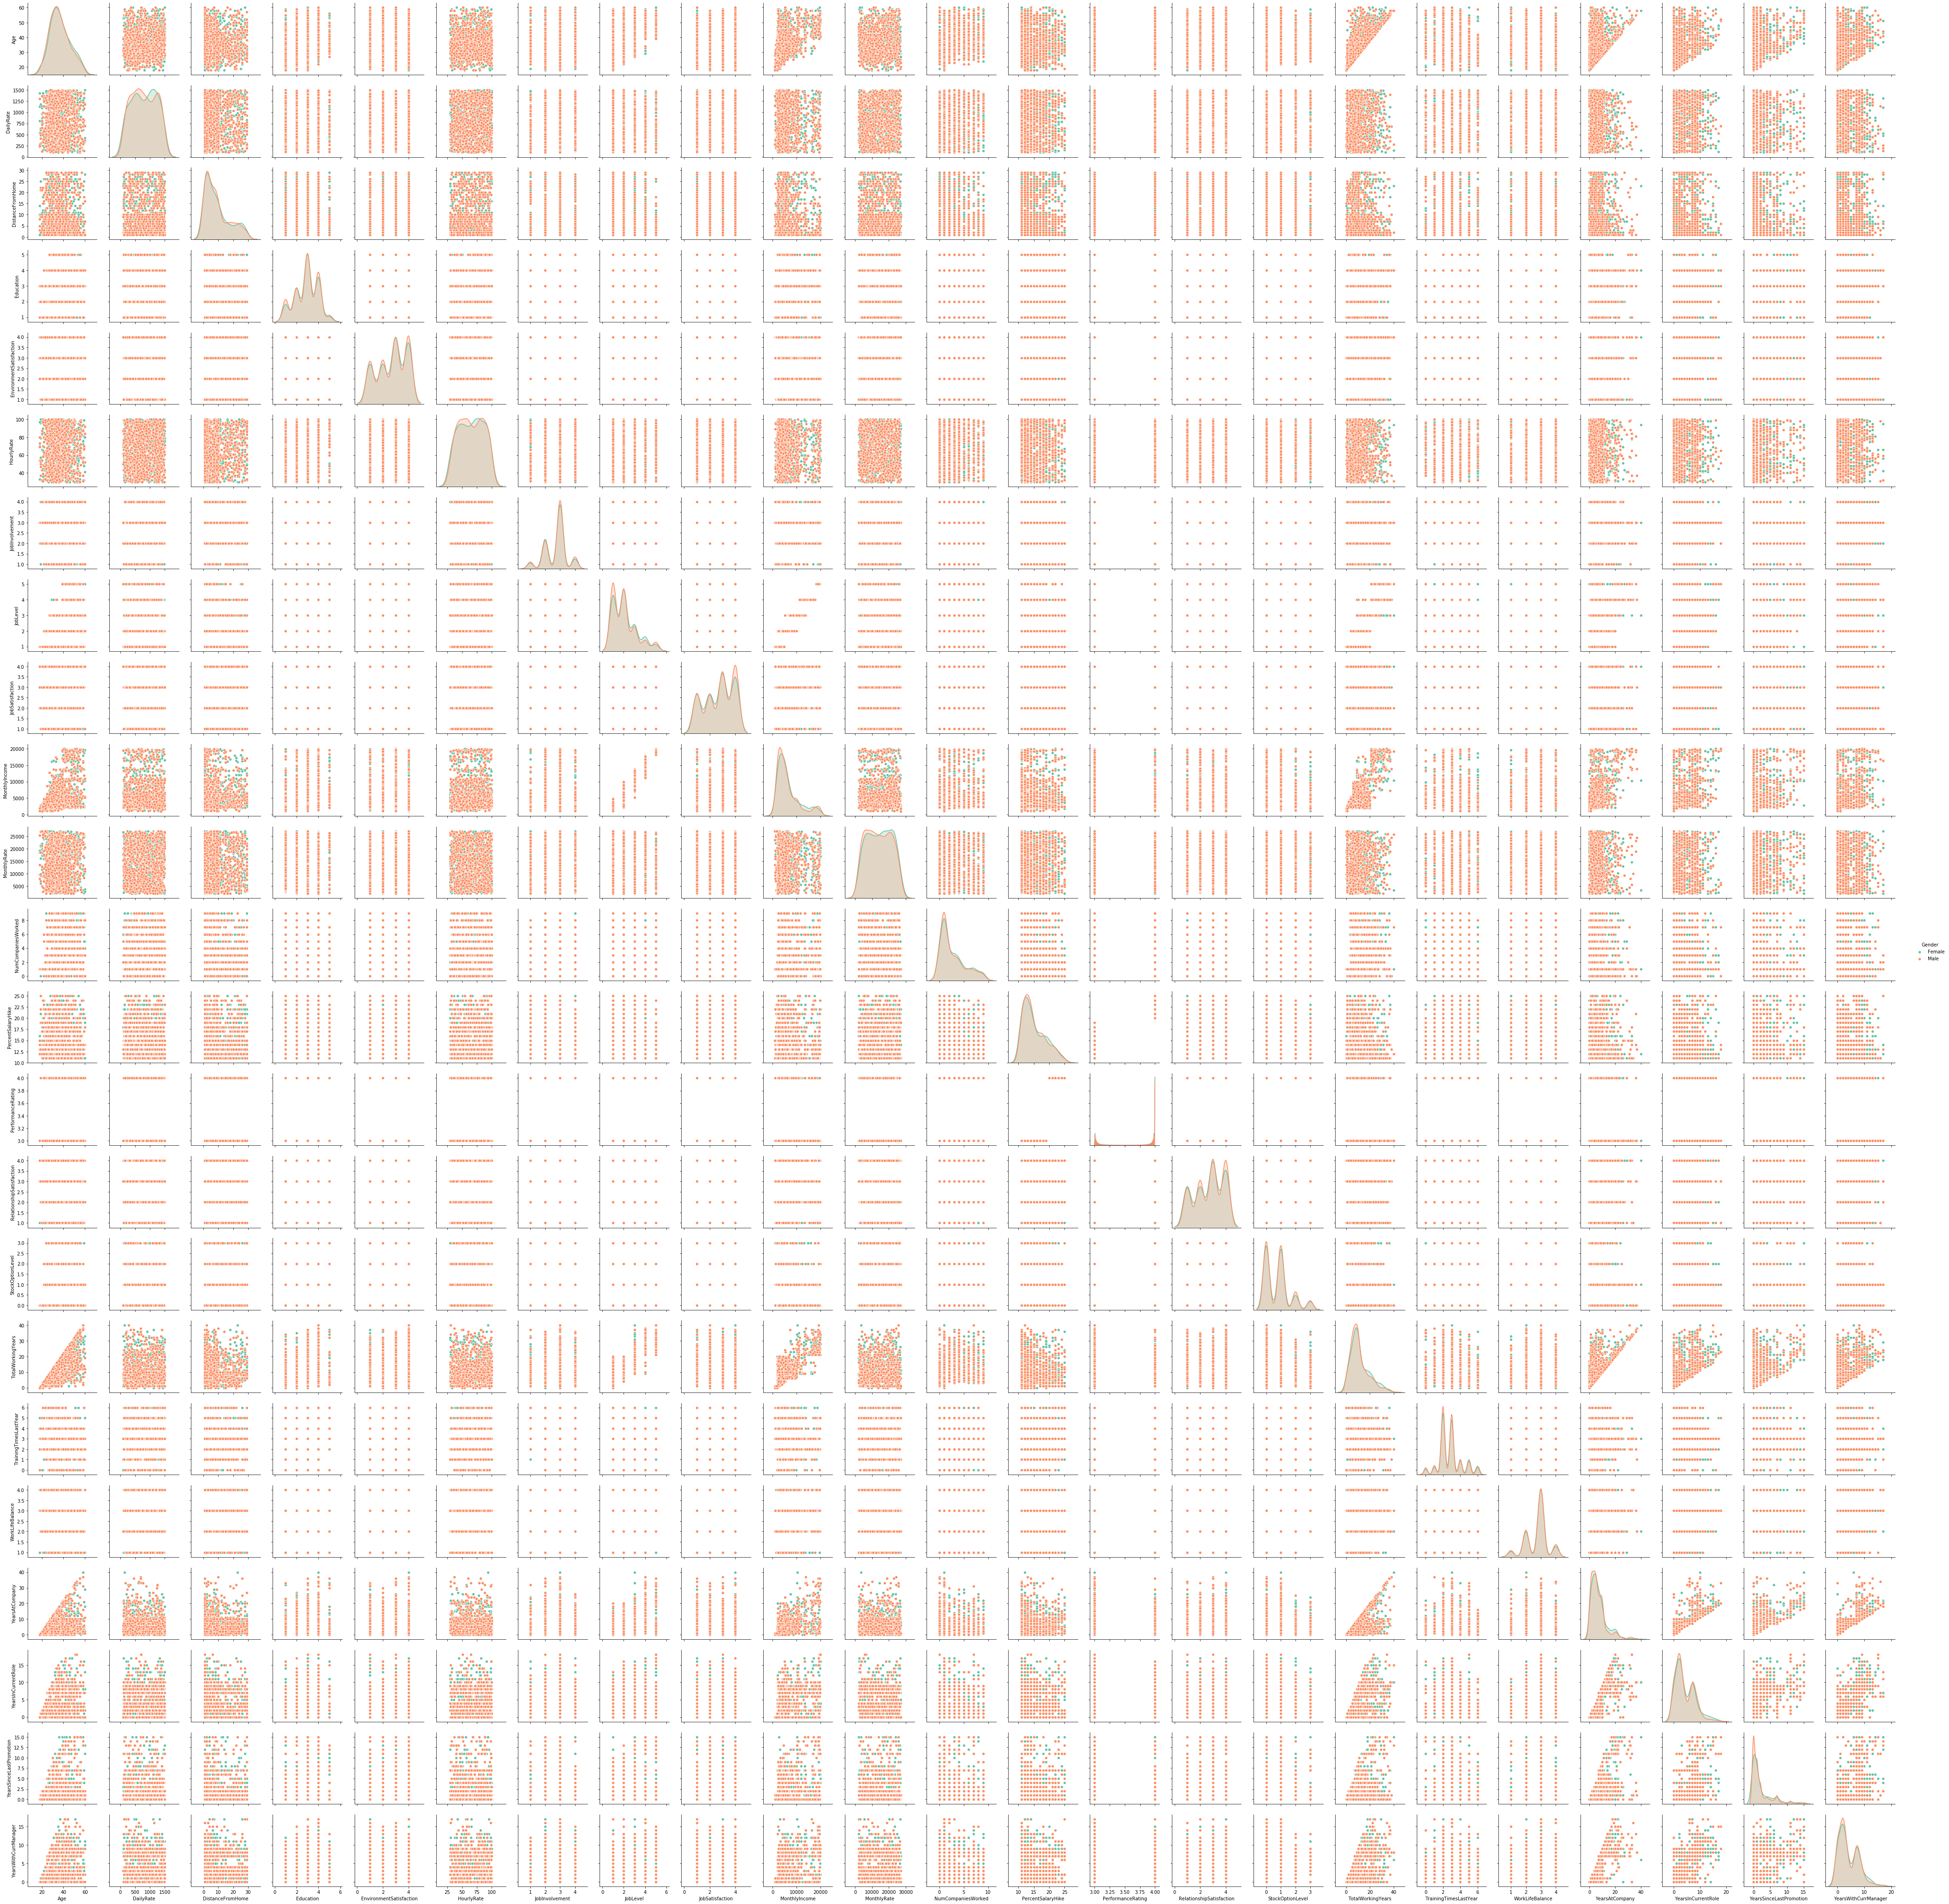

In [30]:
g = sns.pairplot(df, hue="Gender", palette="Set2", diag_kind="kde", height=2.5)

### Analysing actegorical variables

In [0]:
categorical=df.select_dtypes(include=['object'])

In [32]:
categorical.head()

Attrition     BusinessTravel  ... MaritalStatus OverTime
0       Yes      Travel_Rarely  ...        Single      Yes
1        No  Travel_Frequently  ...       Married       No
2       Yes      Travel_Rarely  ...        Single      Yes
3        No  Travel_Frequently  ...       Married      Yes
4        No      Travel_Rarely  ...       Married       No

[5 rows x 8 columns]

Attrition- department

<function matplotlib.pyplot.show>

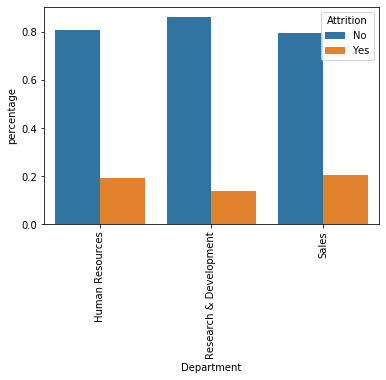

In [34]:
df_attrition_department= df[["Attrition","Department"]].groupby ("Department").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="Department", y="percentage", hue="Attrition", data=df_attrition_department) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition- BusinessTravel

<function matplotlib.pyplot.show>

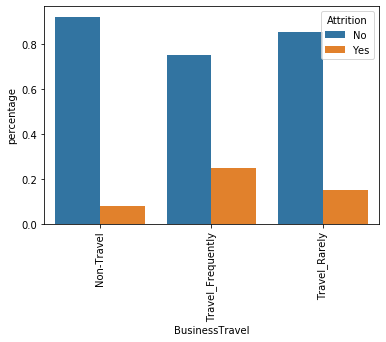

In [35]:
df_attrition_BusinessTravel= df[["Attrition","BusinessTravel"]].groupby ("BusinessTravel").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="BusinessTravel", y="percentage", hue="Attrition", data=df_attrition_BusinessTravel) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition- Gender

<function matplotlib.pyplot.show>

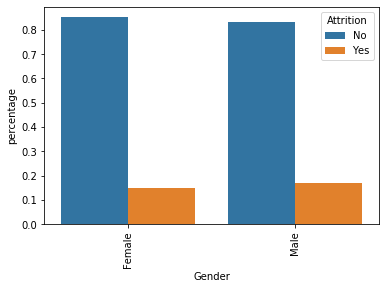

In [36]:
df_attrition_Gender= df[["Attrition","Gender"]].groupby ("Gender").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="Gender", y="percentage", hue="Attrition", data=df_attrition_Gender) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-EducationField

<function matplotlib.pyplot.show>

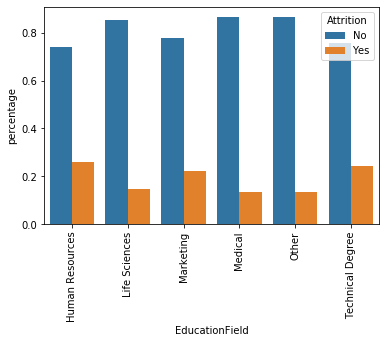

In [37]:
df_attrition_EducationField= df[["Attrition","EducationField"]].groupby ("EducationField").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="EducationField", y="percentage", hue="Attrition", data=df_attrition_EducationField) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-JobRole

<function matplotlib.pyplot.show>

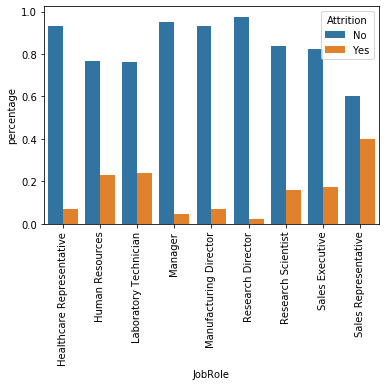

In [39]:

df_attrition_JobRole= df[["Attrition","JobRole"]].groupby ("JobRole").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="JobRole", y="percentage", hue="Attrition", data=df_attrition_JobRole) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-MaritalStatus

<function matplotlib.pyplot.show>

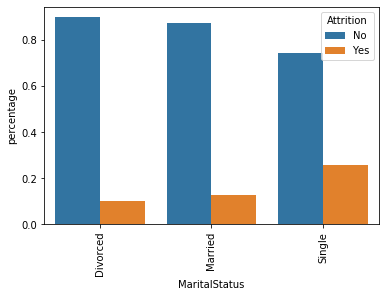

In [40]:
df_attrition_MaritalStatus= df[["Attrition","MaritalStatus"]].groupby ("MaritalStatus").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="MaritalStatus", y="percentage", hue="Attrition", data=df_attrition_MaritalStatus) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

Attrition-OverTime

<function matplotlib.pyplot.show>

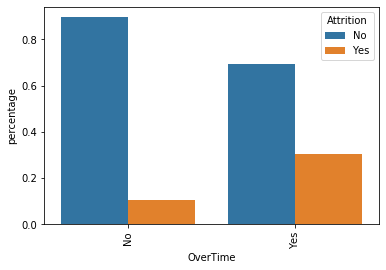

In [41]:
df_attrition_OverTime= df[["Attrition","OverTime"]].groupby ("OverTime").Attrition.value_counts(normalize=True).rename('percentage').reset_index()
p=sns.barplot(x="OverTime", y="percentage", hue="Attrition", data=df_attrition_OverTime) 
plt.setp(p.get_xticklabels(), rotation=90)
plt.show